# Data Preprocessing

### Importing the data

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#Importing the data
df = pd.read_csv('BankChurners.csv',delimiter=';')
df.head(4)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4


### One hot encoding to Gender and Marital_Status

In [8]:
#Implementing one hot encoding to Gender and Marital_Status features
hot_encoding_df = pd.get_dummies(df[['Gender','Marital_Status']],drop_first=True)

#Deleting the unknowns column of the marital status
del hot_encoding_df['Marital_Status_Unknown']

#Deleting the initial Gender Feature
del df['Gender']

#Deleting the inital Marital_Status Feature
del df['Marital_Status']

#Concatenating the the hot encoded columns with the rest of the dataset
df =  pd.concat([df, hot_encoding_df], axis=1)

df.head(4)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Gender_M,Marital_Status_Married,Marital_Status_Single
0,768805383,Existing Customer,45,3,High School,$60K - $80K,Blue,39,1,1,1,0
1,818770008,Existing Customer,49,5,Graduate,Less than $40K,Blue,44,1,0,0,1
2,713982108,Existing Customer,51,3,Graduate,$80K - $120K,Blue,36,1,1,1,0
3,769911858,Existing Customer,40,4,High School,Less than $40K,Blue,34,4,0,0,0


### Preprocessing Education_Level Column

In [9]:
#Finding the indexes of the unknown row of Education_level
unknown_indexes = df[(df['Education_Level'] == 'Unknown')].index
edu_clean = df.drop(unknown_indexes, inplace=False)['Education_Level']

#Declaring the mapping 
edu_mapping = {
            'Uneducated':1,
            'High School':2,
            'College':3,
            'Graduate':4,
            'Post-Graduate':5,
            'Doctorate':6
          }

#Implementing the mapping
edu_clean_mapped = edu_clean .map(edu_mapping)

#Finding the mean value of the column after the mapping
edu_mean =  edu_clean_mapped.mean()

#Assigning this mean value to the unknown rows
edu_mapping = {
            'Uneducated':1,
            'High School':2,
            'College':3,
            'Unknown': edu_mean,
            'Graduate':4,
            'Post-Graduate':5,
            'Doctorate':6
          }

df['Education_Level'] = df['Education_Level'].map(edu_mapping)


df.head(4)



,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Gender_M,Marital_Status_Married,Marital_Status_Single
0,768805383,Existing Customer,45,3,2.0,$60K - $80K,Blue,39,1,1,1,0
1,818770008,Existing Customer,49,5,4.0,Less than $40K,Blue,44,1,0,0,1
2,713982108,Existing Customer,51,3,4.0,$80K - $120K,Blue,36,1,1,1,0
3,769911858,Existing Customer,40,4,2.0,Less than $40K,Blue,34,4,0,0,0


### Preprocessing Income_Category Column

In [10]:
#Finding the indexes of the unknown row of Income_Category
unknown_indexes = df[(df['Income_Category'] == 'Unknown')].index
income_clean = df.drop(unknown_indexes, inplace=False)['Income_Category']

#Declaring the mapping 
income_mapping = {
            'Less than $40K':40,
            '$40K - $60K':50,
            '$80K - $120K':100,
            '$60K - $80K':70,
            '$120K + ':120
          }

#Implementing the mapping
income_clean = income_clean.map(income_mapping)

#Finding the mean value of the column after the mapping
income_mean =  income_clean.mean()

#Assigning this mean value to the unknown rows
income_mapping = {
            'Less than $40K':40,
            '$40K - $60K':50,
            '$80K - $120K':100,
            '$60K - $80K':70,
            '$120K +':120,
            'Unknown': income_mean
          }

df['Income_Category'] = df['Income_Category'].map(income_mapping)

df.head(4)


,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Gender_M,Marital_Status_Married,Marital_Status_Single
0,768805383,Existing Customer,45,3,2.0,70.0,Blue,39,1,1,1,0
1,818770008,Existing Customer,49,5,4.0,40.0,Blue,44,1,0,0,1
2,713982108,Existing Customer,51,3,4.0,100.0,Blue,36,1,1,1,0
3,769911858,Existing Customer,40,4,2.0,40.0,Blue,34,4,0,0,0


### Preprocessing  Card-Category  Column

In [11]:

#Declaring the mapping 
card_mapping = {
            'Blue':1,
            'Silver':2,
            'Gold':3,
            'Platinum':4
          }

#Implementing the mapping
df['Card_Category'] = df['Card_Category'].map(card_mapping)
df.head(4)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Gender_M,Marital_Status_Married,Marital_Status_Single
0,768805383,Existing Customer,45,3,2.0,70.0,1,39,1,1,1,0
1,818770008,Existing Customer,49,5,4.0,40.0,1,44,1,0,0,1
2,713982108,Existing Customer,51,3,4.0,100.0,1,36,1,1,1,0
3,769911858,Existing Customer,40,4,2.0,40.0,1,34,4,0,0,0


### Preprocessing  Attrition_Flag Column

In [12]:
#Declaring the mapping 
attrition_flag = {
            'Existing Customer':0,
            'Attrited Customer':1
          }

#Implementing the mapping
df['Attrition_Flag']= df['Attrition_Flag'].map(attrition_flag)

#Standardizing features by removing the mean and scaling to unit variance
std = StandardScaler()
X = std.fit_transform(df[['Customer_Age','Dependent_count','Education_Level','Income_Category','Card_Category','Months_on_book']])
df.head(4)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Gender_M,Marital_Status_Married,Marital_Status_Single
0,768805383,0,45,3,2.0,70.0,1,39,1,1,1,0
1,818770008,0,49,5,4.0,40.0,1,44,1,0,0,1
2,713982108,0,51,3,4.0,100.0,1,36,1,1,1,0
3,769911858,0,40,4,2.0,40.0,1,34,4,0,0,0


### Deleting the CLIENTNUM

In [13]:
del df['CLIENTNUM']
df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Gender_M,Marital_Status_Married,Marital_Status_Single
0,0,45,3,2.000000,70.0,1,39,1,1,1,0
1,0,49,5,4.000000,40.0,1,44,1,0,0,1
2,0,51,3,4.000000,100.0,1,36,1,1,1,0
3,0,40,4,2.000000,40.0,1,34,4,0,0,0
4,0,40,3,1.000000,70.0,1,21,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,4.000000,50.0,1,40,2,1,0,1
10123,1,41,2,3.061106,50.0,1,25,2,1,0,0
10124,1,44,1,2.000000,40.0,1,36,3,0,1,0
10125,1,30,2,4.000000,50.0,1,36,3,1,0,0


# Implementing Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df['Attrition_Flag']
X = df.drop('Attrition_Flag',axis =1)

#Spliting the data to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#Declaring the model
lr = LogisticRegression(max_iter=1000)

#Training the model
lr.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

### Calculating Acuracy

In [15]:

#Getting the predictions for the test set
predictions = lr.predict(X_test)

#Comparing the predictions to the expected values
accuracy = sum(predictions == y_test)/len(y_test)*100
print('Accuracy: %.2f %%'%accuracy)




Accuracy: 83.97 %


### Calculating Precision, Recall and F_score

In [16]:
def prf_measure(predictions,y):
    '''Function which calculates the 
    precision the recall and the 
    f_score.'''

    TP = 0
    FP = 0
    TN = 0
    FN = 0


    for i in range(len(predictions)):
        if predictions[i]==1  and y[i]==1:
            TP+=1
        if predictions[i]==1 and y[i]==0:
            FP+=1
        if predictions[i]==0 and y[i]==0:
            TN+=1
        if predictions[i]==0 and y[i]==1:
            FN+=1
     
    if(TP+FN>0):
        recall = TP/(TP+FN)
    else:
        recall =0
    if(TP+FP>0):
        precision = TP/(TP+FP)
    else:
        precision =0
        
    if(precision+recall>0):
        f_score = 2*(prediction*recall)/(prediction+recall)
    else:
        f_score = 0
    
    
    return [precision,recall,f_score]


y_test = np.array(y_test)

prediction,recall,f_score = prf_measure(predictions,y_test)

print('Recall: %.2f'%recall)
print('prediction: %.2f'%prediction)
print('f_score: %.2f'%f_score)



Recall: 0.00
prediction: 0.00
f_score: 0.00


# Exploring the dataset

### Calculating the percentage of presence of the predicted class

Percentage of 1: 16.07 % 
Percentage of 0: 83.93 % 


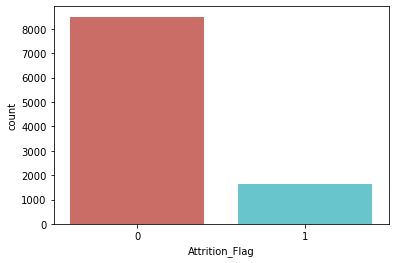

In [17]:
import seaborn as sns
percentage = sum(y==1)/len(y)*100
sns.countplot(x='Attrition_Flag',data=df,palette='hls')


print('Percentage of 1: %.2f %% ' %percentage)
print('Percentage of 0: %.2f %% ' %(float(100)-percentage))

In [18]:
df.groupby('Attrition_Flag').mean()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Gender_M,Marital_Status_Married,Marital_Status_Single
Attrition_Flag,,,,,,,,,,
0,46.262118,2.335412,3.050256,62.848351,1.083294,35.880588,2.273765,0.479059,0.468000,0.385294
1,46.659496,2.402581,3.117789,62.379158,1.085433,36.178242,2.693301,0.428396,0.435771,0.410572


 # Over-sampling the training dataset

### Making the necessary adjustments in the dataset

In [19]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns

os_data_X, os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition_Flag'])
os_data_y = os_data_y.values.ravel()

print("Initial X_train size: %d"%len(X_train))
print("Values in y_train:")
print("Zero Values %d"%sum(y_train==0))
print("One Values %d"%sum(y_train==1))


print("\n~~~~~OVERSAMPLING~~~~~\n")

print("Oversampled X_train size: %d"%len(os_data_X ))
print("Values in oversampled y_train:")
print("Zero Values %d"%sum(os_data_y==0))
print("One Values %d"%sum(os_data_y==1))



Initial X_train size: 7088
Values in y_train:
Zero Values 5947
One Values 1141

~~~~~OVERSAMPLING~~~~~

Oversampled X_train size: 11894
Values in oversampled y_train:
Zero Values 5947
One Values 5947


# Recursive Feature Elimination

### Implementation

In [20]:
from sklearn.feature_selection import RFE

data_final_vars=df.columns.values.tolist()

y = 'Attrition_Flag'
X = [i for i in data_final_vars if i not in y]

logreg = LogisticRegression(max_iter=100000)

rfe = RFE(logreg)
rfe = rfe.fit(os_data_X,os_data_y)
print(X)
print(rfe.support_)
print(rfe.ranking_)



['Customer_Age', 'Dependent_count', 'Education_Level', 'Income_Category', 'Card_Category', 'Months_on_book', 'Months_Inactive_12_mon', 'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single']
[False False False False  True False  True  True  True  True]
[5 2 3 4 1 6 1 1 1 1]


### Deleting the features that didn't perform well

In [21]:
X_os_new = os_data_X[['Card_Category','Months_Inactive_12_mon'
                      ,'Gender_M','Marital_Status_Married',
                        'Marital_Status_Single']]
X_test_new = X_test[['Card_Category','Months_Inactive_12_mon'
                      ,'Gender_M','Marital_Status_Married',
                        'Marital_Status_Single']]



### Training the model and printing the results

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



#Declaring the model
lr = LogisticRegression(max_iter=10000)

#Training the model
lr.fit(X_os_new,os_data_y )

#Getting the predictions for the test set
predictions = lr.predict(X_test_new)
accuracy = sum(predictions == y_test)/len(y_test)*100
print('Accuracy: %.2f %%'%accuracy)

prediction,recall,f_score = prf_measure(predictions,y_test)

print('Recall: %.2f'%recall)
print('Precision: %.2f'%prediction)
print('f_score: %.2f'%f_score)

Accuracy: 73.02 %
Recall: 0.21
Precision: 0.19
f_score: 0.20


# Adding polynomial features

In [23]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LogisticRegression


#Adding the polynomial to the training data
poly = PolynomialFeatures(degree = 5, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_os_new)

#Apply scaling on training data
scaler = StandardScaler().fit(X_poly)

X_poly_scaled = scaler.transform(X_poly)

lr = LogisticRegression(max_iter=1000000000)
lr.fit(X_poly ,os_data_y)





LogisticRegression(max_iter=1000000000)

In [24]:

#Adding the polynomial to the test data
X_poly_test= poly.transform(X_test_new)

#Scaling the test data
X_poly_test_scaled = scaler.transform(X_poly_test)

#Getting the predictions for the test set
predictions = lr.predict(X_poly_test_scaled )

accuracy = sum(predictions == y_test)/len(y_test)*100
print('Accuracy: %.2f %%'%accuracy)

Accuracy: 59.43 %


In [25]:
y_test = np.array(y_test)
precision,recall,f_score = prf_measure(predictions,y_test)

print('Recall: %.2f'%recall)
print('Precision: %.2f'%precision)
print('f_score: %.2f'%f_score)

Recall: 0.49
Precision: 0.20
f_score: 0.28
